**Name:- Pranjal Godse------------
Batch:- 6**

# Problem 2 - Word Embedding Explorer
This notebook demonstrates:
- Loading pretrained embeddings (GloVe, Word2Vec, FastText)
- Word similarity
- Analogy tasks
- OOV handling comparison
- PCA & t-SNE visualization

In [5]:
!pip install gensim

  Using cached gensim-4.4.0-cp312-cp312-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (8.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 64.5 MB/s eta 0:00:00


In [6]:
!pip install gensim scikit-learn matplotlib

In [1]:
!pip install gensim sklearn matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import gensim.downloader as api

## Load Pretrained Models

In [8]:
glove = api.load("glove-wiki-gigaword-100")
word2vec = api.load("word2vec-google-news-300")
fasttext = api.load("fasttext-wiki-news-subwords-300")

[==================================================] 100.0% 128.1/128.1MB downloaded
[==================================================] 100.0% 1662.8/1662.8MB downloaded
[==================================================] 100.0% 958.5/958.4MB downloaded


## Word Similarity Example

In [9]:
print("GloVe Similarity (king, queen):", glove.similarity("king", "queen"))
print("Word2Vec Similarity (king, queen):", word2vec.similarity("king", "queen"))
print("FastText Similarity (king, queen):", fasttext.similarity("king", "queen"))

GloVe Similarity (king, queen): 0.7507691
Word2Vec Similarity (king, queen): 0.6510957
FastText Similarity (king, queen): 0.7704246


## Word Analogy Example

In [10]:
print("GloVe Analogy:", glove.most_similar(positive=["king","woman"], negative=["man"], topn=1))
print("Word2Vec Analogy:", word2vec.most_similar(positive=["king","woman"], negative=["man"], topn=1))
print("FastText Analogy:", fasttext.most_similar(positive=["king","woman"], negative=["man"], topn=1))

GloVe Analogy: [('queen', 0.7698540687561035)]
Word2Vec Analogy: [('queen', 0.7118193507194519)]
FastText Analogy: [('queen', 0.7786749005317688)]


## OOV (Out of Vocabulary) Test

In [11]:
print("GloVe:", glove.has_index_for("programminggg"))
print("Word2Vec:", word2vec.has_index_for("programminggg"))
print("FastText:", fasttext.has_index_for("programminggg"))

GloVe: False
Word2Vec: False
FastText: False


## PCA Visualization

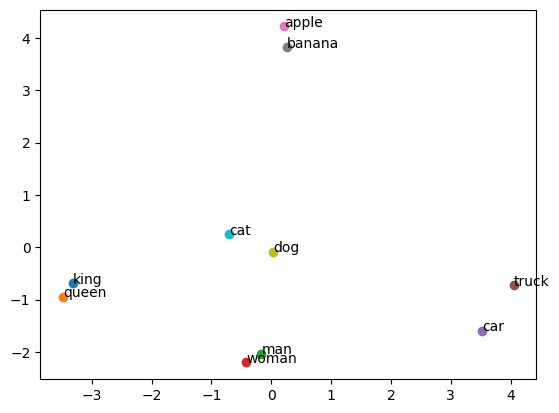

In [12]:
words = ["king","queen","man","woman","car","truck","apple","banana","dog","cat"]
vectors = [glove[word] for word in words]

pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

plt.figure()
for i, word in enumerate(words):
    plt.scatter(result[i,0], result[i,1])
    plt.text(result[i,0], result[i,1], word)

plt.show()

## t-SNE Visualization

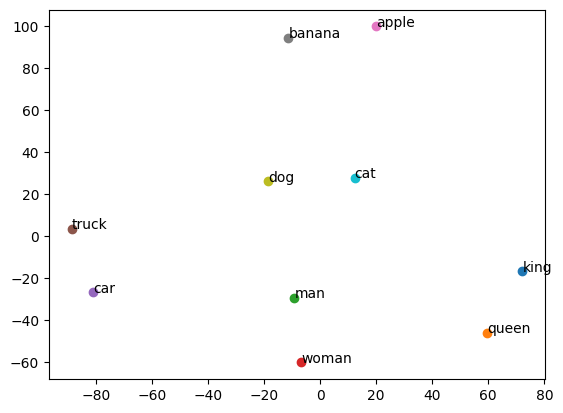

In [14]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Convert to numpy array
vectors = np.array(vectors)

# Set small perplexity (must be < number of words)
tsne = TSNE(n_components=2, random_state=42, perplexity=5)

result = tsne.fit_transform(vectors)

plt.figure()
for i, word in enumerate(words):
    plt.scatter(result[i,0], result[i,1])
    plt.text(result[i,0], result[i,1], word)

plt.show()
